##  INFOSYS STOCK MARKETING PRICE PREDICTION FROM [01-07-2015 to 01-07-2020(5 Years)]
### DATASET FROM NSE India (National Stock Exchange of India Ltd)
### K-NEAREST-NEIGHBORS

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [25]:
INFOSYS= pd.read_csv("C://Users//hp//Desktop//STOCK_MARKET//INFY.NS.csv")
INFOSYS = INFOSYS.dropna()
INFOSYS = INFOSYS[['Date','Open', 'High', 'Low','Close','Adj Close','Volume']]
INFOSYS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.5,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.5,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.0,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.5,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.5,495.000000,489.500000,490.250000,408.519897,3497418.0


In [26]:
INFOSYS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


In [27]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.7+ KB


In [28]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [29]:
layout = go.Layout(
    title='STOCK PRICE OF INFOSYS',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
INFOSYS_DATA = [{'x':INFOSYS['Date'], 'y':INFOSYS['Close']}]
plot = go.Figure(data=INFOSYS_DATA, layout=layout)

In [30]:
iplot(plot)

In [6]:
INFOSYS['Open-Close']= INFOSYS.Close - INFOSYS.Open
INFOSYS['High-Low']  = INFOSYS.High - INFOSYS.Low
INFOSYS = INFOSYS.dropna()
X= INFOSYS[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,4.200012,9.500000
1,-5.500000,8.175018
2,1.149994,5.500000
3,-0.850006,6.500000
4,-2.250000,5.500000


In [8]:
Y= np.where(INFOSYS['Close'].shift(-1)>INFOSYS['Close'],1,-1)

In [10]:
split_percentage = 0.7
split = int(split_percentage*len(INFOSYS))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [11]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.63
Test_data Accuracy: 0.43


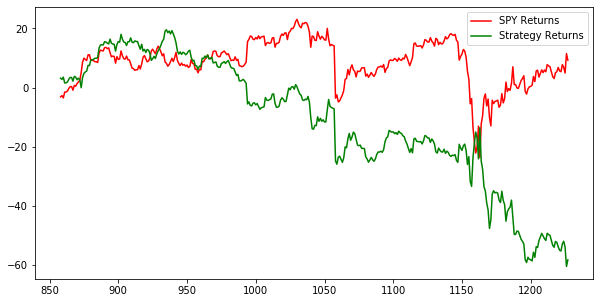

In [13]:
INFOSYS['Predicted_Signal'] = knn.predict(X)

INFOSYS['SPY_returns'] = np.log(INFOSYS['Close']/INFOSYS['Close'].shift(1))
Cumulative_SPY_returns = INFOSYS[split:]['SPY_returns'].cumsum()*100
 
INFOSYS['Startegy_returns'] = INFOSYS['SPY_returns']* INFOSYS['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = INFOSYS[split:]['Startegy_returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [14]:
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print ('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: -0.92


In [15]:
model = knn.fit(X_train, Y_train)
model = model.fit (X_train,Y_train)

In [16]:
probability = model.predict_proba(X_test)
print(probability)

[[0.66666667 0.33333333]
 [0.53333333 0.46666667]
 [0.66666667 0.33333333]
 [0.46666667 0.53333333]
 [0.4        0.6       ]
 [0.33333333 0.66666667]
 [0.46666667 0.53333333]
 [0.53333333 0.46666667]
 [0.33333333 0.66666667]
 [0.4        0.6       ]
 [0.4        0.6       ]
 [0.53333333 0.46666667]
 [0.4        0.6       ]
 [0.6        0.4       ]
 [0.66666667 0.33333333]
 [0.26666667 0.73333333]
 [0.33333333 0.66666667]
 [0.6        0.4       ]
 [0.6        0.4       ]
 [0.46666667 0.53333333]
 [0.6        0.4       ]
 [0.6        0.4       ]
 [0.4        0.6       ]
 [0.53333333 0.46666667]
 [0.66666667 0.33333333]
 [0.4        0.6       ]
 [0.53333333 0.46666667]
 [0.4        0.6       ]
 [0.46666667 0.53333333]
 [0.73333333 0.26666667]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.53333333 0.46666667]
 [0.4        0.6       ]
 [0.53333333 0.46666667]
 [0.6        0.4       ]
 [0.2        0.8       ]
 [0.53333333 0.46666667]
 [0.4        0.6       ]
 [0.33333333 0.66666667]


In [17]:
predicted = model.predict(X_test)

In [18]:
from sklearn import metrics

In [19]:
print(metrics.confusion_matrix(Y_test, predicted))

[[ 65 110]
 [ 99  95]]


In [20]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.40      0.37      0.38       175
           1       0.46      0.49      0.48       194

    accuracy                           0.43       369
   macro avg       0.43      0.43      0.43       369
weighted avg       0.43      0.43      0.43       369



In [21]:
print(model.score(X_train,Y_train))

0.6317016317016317


### ACCURACY OF TRAINING MODEL FOR INFOSYS STOCK MARKET PRICE PREDICTION IS ABOUT 63%.